In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
mfile_merge = pd.read_csv('mfile_merge.csv')

In [3]:
mfile_merge

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장
0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1,매장B
1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0,매장C
2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0,매장C
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,매장A
4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1,매장C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0,0,47.0,0,0,0,40대,39246.0,수지구,동천동,0,1,1,매장A
11538,999721408,1,0,43.0,0,0,0,40대,43457.0,수지구,동천동,0,2,1,매장A
11539,999738112,1,0,67.0,0,0,0,60대,152960.0,수지구,성복동,1,9,1,매장D
11540,999754816,1,0,44.0,1,0,0,40대,641334.0,수지구,상현동,0,21,1,매장B


In [4]:
dd = mfile_merge.pivot_table(index = '연령대', values = '구매금액', aggfunc = 'sum').reset_index()

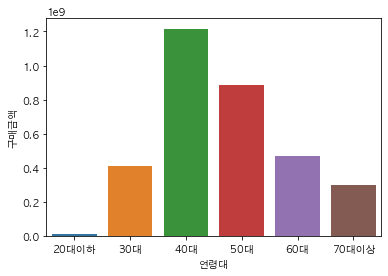

In [7]:
sns.barplot(data = dd , x = '연령대', y = '구매금액')

In [8]:
dd = mfile_merge.pivot_table(index = '연령대', values = '구매금액', aggfunc = 'mean').reset_index()
dd

,연령대,구매금액
0,20대이하,206423.113208
1,30대,192508.518501
2,40대,271699.142091
3,50대,347181.522611
4,60대,322594.958018
5,70대이상,335693.226757


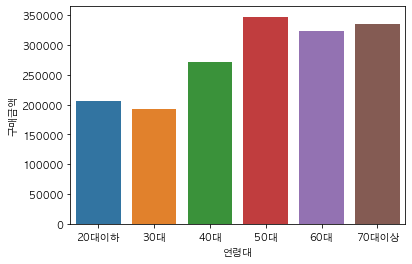

In [9]:
sns.barplot(data = dd , x = '연령대', y = '구매금액')

In [4]:
total4 = pd.read_csv('total4.csv')
total4

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수


In [5]:
prod_pivot = pd.read_csv('prod_pivot.csv')

In [6]:
prod_pivot

,회원번호,반찬,채소,축산물,생활용품,간식,건강,양념/가루,음료,과실,수산,주곡,잡곡,서류,주류,기타
0,1000012800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000103744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000122304,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000163136,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1000281920,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11538,999721408,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11539,999738112,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11540,999754816,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mfile = mfile_merge.merge(prod_pivot, how = 'left', on = '회원번호' )
mfile

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장,반찬,채소,축산물,생활용품,간식,건강,양념/가루,음료,과실,수산,주곡,잡곡,서류,주류,기타
0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1,매장B,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0,매장C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0,매장C,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,매장A,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1,매장C,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0,0,47.0,0,0,0,40대,39246.0,수지구,동천동,0,1,1,매장A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11538,999721408,1,0,43.0,0,0,0,40대,43457.0,수지구,동천동,0,2,1,매장A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11539,999738112,1,0,67.0,0,0,0,60대,152960.0,수지구,성복동,1,9,1,매장D,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11540,999754816,1,0,44.0,1,0,0,40대,641334.0,수지구,상현동,0,21,1,매장B,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 매장별 회원정보

In [8]:
mfile.columns

Index(['회원번호', '조합원상태', '성별', '연령', '배송서비스신청여부', '모바일알람여부', 'Gold_member',
       '연령대', '구매금액', '구', '동', '연령60이상', '방문횟수', '연령대_4560대', '구매매장', '반찬',
       '채소', '축산물', '생활용품', '간식', '건강', '양념/가루', '음료', '과실', '수산', '주곡', '잡곡',
       '서류', '주류', '기타'],
      dtype='object')

In [9]:
memberA = mfile[mfile['구매매장'] == '매장A']
memberB = mfile[mfile['구매매장'] == '매장B']
memberC = mfile[mfile['구매매장'] == '매장C']
memberD = mfile[mfile['구매매장'] == '매장D']

In [206]:
m1 = mfile.drop(['성별','조합원상태','배송서비스신청여부','모바일알람여부','연령',"구","동","회원번호","연령60이상","연령대_4560대"],axis=1,inplace=False)
m1

,Gold_member,연령대,구매금액,방문횟수,구매매장,반찬,채소,축산물,생활용품,간식,건강,양념/가루,음료,과실,수산,주곡,잡곡,서류,주류,기타
0,0,50대,7658.0,1,매장B,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,30대,36948.0,1,매장C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,30대,142831.0,15,매장C,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,70대이상,138892.0,4,매장A,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,40대,632554.0,28,매장C,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,0,40대,39246.0,1,매장A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11538,0,40대,43457.0,2,매장A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11539,0,60대,152960.0,9,매장D,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11540,0,40대,641334.0,21,매장B,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
m2 = pd.get_dummies(m1)
m2

,Gold_member,구매금액,방문횟수,반찬,채소,축산물,생활용품,간식,건강,양념/가루,음료,과실,수산,주곡,잡곡,서류,주류,기타,연령대_20대이하,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대이상,구매매장_매장A,구매매장_매장B,구매매장_매장C,구매매장_매장D
0,0,7658.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0
1,0,36948.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,0,142831.0,15,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0
3,0,138892.0,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0
4,0,632554.0,28,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,0,39246.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0
11538,0,43457.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0
11539,0,152960.0,9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1
11540,0,641334.0,21,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0


In [18]:
clus=KMeans(4)
clus.fit(m2)
cluster_kmeans=[j+1 for j in clus.labels_]
m2["ClusterKmeans"]=cluster_kmeans

In [20]:
average_score = silhouette_score(m2.drop(['ClusterKmeans'], axis = 1), m2['ClusterKmeans'])

In [21]:
average_score

0.7289859056454938

In [199]:
avg = {}
for i in range(2,20):
    clus=KMeans(i)
    clus.fit(m2)
    cluster_kmeans=[j+1 for j in clus.labels_]
    m2["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(m2.drop(['ClusterKmeans'], axis = 1), m2['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.8256528569106965
3 : 0.7637289594368997
4 : 0.7289859330991959
5 : 0.7100065524774931
6 : 0.6786717585984426
7 : 0.672248759219039
8 : 0.6686210135049933
9 : 0.645857220910189
10 : 0.6301930394082846
11 : 0.6314805667975717
12 : 0.62556427172191
13 : 0.6133697081982654
14 : 0.6124941119572856
15 : 0.6058665304831387
16 : 0.6067104711615569
17 : 0.5952987609281087
18 : 0.5942807900647018
19 : 0.5770459798881117


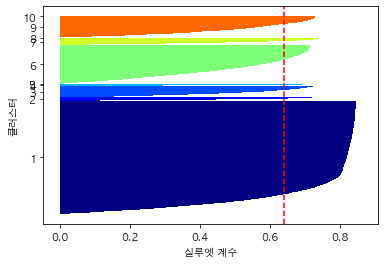

In [212]:
clus=KMeans(10, random_state= 0)
y_km = clus.fit_predict(m2)
plotSilhouette(m2, y_km)

In [196]:
ds_summary_km=m2.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,성별_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,반찬_mean,채소_mean,축산물_mean,생활용품_mean,간식_mean,건강_mean,양념/가루_mean,음료_mean,과실_mean,수산_mean,주곡_mean,잡곡_mean,서류_mean,주류_mean,기타_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장A_mean,구매매장_매장B_mean,구매매장_매장C_mean,구매매장_매장D_mean
0,1,0.060823,0.000000,2.221964e+04,1.804579,0.271277,0.306892,0.238899,0.092738,0.342044,0.017808,0.122803,0.131360,0.040934,0.159343,0.022202,0.030296,0.024977,0.003006,0.005088,0.005088,0.214847,0.390148,0.208141,0.115402,0.066374,0.205597,0.268733,0.351989,0.173682
1,2,0.000000,0.489362,2.684869e+06,87.851064,0.340426,0.936170,0.829787,0.000000,0.765957,0.000000,0.021277,0.042553,0.000000,0.063830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106383,0.255319,0.340426,0.255319,0.042553,0.276596,0.191489,0.361702,0.170213
2,3,0.071429,0.035714,8.988960e+05,39.123377,0.441558,0.821429,0.743506,0.045455,0.574675,0.016234,0.035714,0.129870,0.042208,0.139610,0.003247,0.006494,0.000000,0.000000,0.000000,0.006494,0.129870,0.350649,0.262987,0.165584,0.084416,0.175325,0.230519,0.415584,0.178571
3,4,0.058824,0.105882,1.324086e+06,51.447059,0.429412,0.870588,0.788235,0.058824,0.629412,0.011765,0.023529,0.064706,0.035294,0.088235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.376471,0.294118,0.105882,0.123529,0.129412,0.235294,0.394118,0.241176
4,5,0.064120,0.001364,3.849533e+05,19.619372,0.564802,0.683492,0.611187,0.081855,0.581173,0.036835,0.069577,0.136426,0.030014,0.154161,0.020464,0.015007,0.005457,0.000000,0.001364,0.004093,0.139154,0.392906,0.234652,0.129604,0.099591,0.178718,0.242838,0.412005,0.166439
5,6,0.000000,0.875000,5.781348e+06,125.750000,0.000000,1.000000,1.000000,0.000000,0.875000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.500000,0.125000,0.000000,0.125000,0.375000,0.125000,0.375000
6,7,0.047571,0.000000,2.606052e+05,14.424089,0.515182,0.653846,0.564777,0.084008,0.549595,0.042510,0.094130,0.157895,0.032389,0.215587,0.031377,0.024291,0.008097,0.005061,0.000000,0.003036,0.163968,0.380567,0.223684,0.139676,0.089069,0.164980,0.225709,0.403846,0.205466
7,8,0.058824,0.705882,4.073488e+06,110.294118,0.294118,0.941176,0.882353,0.058824,0.647059,0.000000,0.058824,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.470588,0.058824,0.117647,0.235294,0.117647,0.470588,0.176471
8,9,0.057571,0.000000,8.352222e+04,4.920174,0.464441,0.416062,0.368650,0.150943,0.528302,0.056120,0.173198,0.178036,0.087083,0.244799,0.039671,0.037736,0.032898,0.001935,0.009676,0.002903,0.206096,0.390421,0.213353,0.118045,0.069182,0.190614,0.280600,0.369134,0.159652
9,10,0.069767,0.220930,1.843610e+06,60.267442,0.395349,0.860465,0.825581,0.023256,0.639535,0.000000,0.069767,0.034884,0.034884,0.104651,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,0.093023,0.348837,0.255814,0.197674,0.104651,0.244186,0.151163,0.395349,0.209302


In [24]:
mA =  memberA.drop(['조합원상태','배송서비스신청여부','모바일알람여부','Gold_member','연령',"구","동","회원번호","연령60이상","연령대_4560대", "구매매장"],axis=1,inplace=False)
mA = pd.get_dummies(mA)
mA

,성별,구매금액,방문횟수,반찬,채소,축산물,생활용품,간식,건강,양념/가루,음료,과실,수산,주곡,잡곡,서류,주류,기타,연령대_20대이하,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대이상
3,0,138892.0,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
6,0,663152.0,32,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
7,0,7083.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
9,0,218435.0,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
10,0,117067.0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0,3733.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
11533,0,7083.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
11535,0,6126.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
11537,0,39246.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0


In [27]:
clus=KMeans(4, random_state= 0)
clus.fit(mA)
cluster_kmeans=[j+1 for j in clus.labels_]
mA["ClusterKmeans"]=cluster_kmeans

In [28]:
average_score = silhouette_score(mA.drop(['ClusterKmeans'], axis = 1), mA['ClusterKmeans'])
average_score

0.7457673901987579

In [29]:
ds_summary_km=mA.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,성별_mean,구매금액_mean,방문횟수_mean,반찬_mean,채소_mean,축산물_mean,생활용품_mean,간식_mean,건강_mean,양념/가루_mean,음료_mean,과실_mean,수산_mean,주곡_mean,잡곡_mean,서류_mean,주류_mean,기타_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean
0,1,0.038462,3.472292e+06,92.423077,0.192308,0.961538,0.884615,0.000000,0.807692,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115385,0.192308,0.461538,0.192308,0.038462
1,2,0.060519,8.663068e+04,4.769452,0.353314,0.376945,0.300288,0.150432,0.470893,0.042075,0.116427,0.154467,0.055331,0.198847,0.029971,0.026513,0.023631,0.005187,0.005764,0.008069,0.221902,0.413833,0.206916,0.106052,0.043228
2,3,0.049231,6.484025e+05,28.360000,0.443077,0.738462,0.627692,0.083077,0.670769,0.021538,0.058462,0.123077,0.049231,0.144615,0.015385,0.015385,0.003077,0.000000,0.000000,0.009231,0.147692,0.421538,0.233846,0.141538,0.046154
3,4,0.059524,1.648193e+06,54.130952,0.416667,0.904762,0.761905,0.047619,0.714286,0.000000,0.023810,0.011905,0.000000,0.119048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.345238,0.261905,0.202381,0.095238


### 실루엣

In [30]:
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
                edgecolor = 'none', color = color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.show()

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib

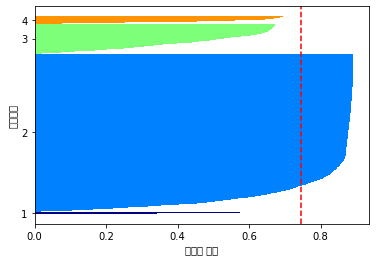

In [31]:
clus=KMeans(4, random_state= 0)
y_km = clus.fit_predict(mA)
plotSilhouette(mA, y_km)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

mA_scaled = mA.loc[:,['방문횟수','구매금액']]
mA.loc[:,['방문횟수','구매금액']] = scaler.fit_transform(mA_scaled)

In [33]:
mA

,성별,구매금액,방문횟수,반찬,채소,축산물,생활용품,간식,건강,양념/가루,음료,과실,수산,주곡,잡곡,서류,주류,기타,연령대_20대이하,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대이상,ClusterKmeans
3,0,0.024527,0.018072,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,2
6,0,0.117104,0.186747,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,3
7,0,0.001251,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,2
9,0,0.038573,0.012048,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,2
10,0,0.020673,0.030120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0,0.000659,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,2
11533,0,0.001251,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,2
11535,0,0.001082,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,2
11537,0,0.006930,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,2


## 파생변수 : 회원당 물품 구매 비율

In [6]:
mem_prod = total4.pivot_table(index = '회원번호', columns = '물품대분류', values = '구매수량', aggfunc = 'sum').fillna(0)

In [7]:
mem_prod

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
회원번호,,,,,,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18764160,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
18792000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18942336,1.0,1.0,5.0,0.0,0.0,2.0,1.0,3.0,0.0,2.0,0.0,1.0,1.0,7.0,9.0
18949760,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644772352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644957952,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1670400000,331.3,24.6,34.0,0.0,173.0,69.0,15.0,111.0,120.0,172.6,22.0,9.0,2.0,197.0,196.0


In [8]:
prod_ratio = mem_prod.apply(lambda x: x/x.sum(), axis = 1).fillna(0)

In [9]:
prod_ratio

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
회원번호,,,,,,,,,,,,,,,
18613824,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18764160,0.333333,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000
18792000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
18942336,0.030303,0.030303,0.151515,0.0,0.000000,0.060606,0.030303,0.090909,0.000000,0.060606,0.000000,0.030303,0.030303,0.212121,0.272727
18949760,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644772352,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1644957952,0.500000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
1670400000,0.224382,0.016661,0.023027,0.0,0.117169,0.046732,0.010159,0.075178,0.081273,0.116898,0.014900,0.006095,0.001355,0.133424,0.132746


In [10]:
mfile2 = mfile_merge.merge(prod_ratio, on = '회원번호' )
mfile2

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1,매장B,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0,매장C,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0,매장C,0.083333,0.0,0.000000,0.0,0.250000,0.000000,0.041667,0.000000,0.083333,0.000000,0.041667,0.000000,0.0,0.333333,0.166667
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,매장A,0.000000,0.0,0.000000,0.0,0.153846,0.307692,0.000000,0.307692,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.153846
4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1,매장C,0.155556,0.0,0.000000,0.0,0.111111,0.022222,0.044444,0.022222,0.044444,0.111111,0.000000,0.000000,0.0,0.200000,0.288889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0,0,47.0,0,0,0,40대,39246.0,수지구,동천동,0,1,1,매장A,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
11538,999721408,1,0,43.0,0,0,0,40대,43457.0,수지구,동천동,0,2,1,매장A,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.666667
11539,999738112,1,0,67.0,0,0,0,60대,152960.0,수지구,성복동,1,9,1,매장D,0.416667,0.0,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.0,0.083333,0.000000
11540,999754816,1,0,44.0,1,0,0,40대,641334.0,수지구,상현동,0,21,1,매장B,0.156863,0.0,0.000000,0.0,0.098039,0.039216,0.000000,0.078431,0.000000,0.039216,0.000000,0.000000,0.0,0.235294,0.352941


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


m_total =  mfile2.drop(['성별','조합원상태','배송서비스신청여부','모바일알람여부','Gold_member','연령',"구","동","회원번호","연령60이상", "구매매장"],axis=1,inplace=False)
m_total = pd.get_dummies(m_total)
m_total_scaled = m_total.loc[:,['방문횟수','구매금액']]
m_total.loc[:,['방문횟수','구매금액']] = scaler.fit_transform(m_total_scaled)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib

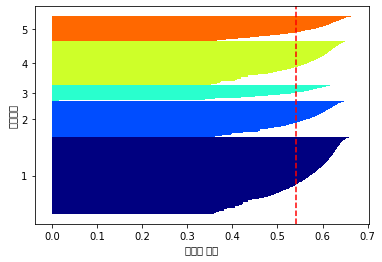

In [35]:
clus=KMeans(5, random_state= 0)
y_km = clus.fit_predict(m_total)
plotSilhouette(m_total, y_km)

In [108]:
memberA = mfile2[mfile2['구매매장'] == '매장A']
memberB = mfile2[mfile2['구매매장'] == '매장B']
memberC = mfile2[mfile2['구매매장'] == '매장C']
memberD = mfile2[mfile2['구매매장'] == '매장D']

In [109]:
member_AD = memberA.append(memberD)
member_AD

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,매장A,0.000000,0.000000,0.000000,0.0,0.153846,0.307692,0.000000,0.307692,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.153846
6,1000491648,1,0,37.0,0,0,0,30대,663152.0,수지구,동천동,0,32,0,매장A,0.176849,0.003215,0.016077,0.0,0.080386,0.064309,0.000000,0.048232,0.112540,0.128617,0.000000,0.000000,0.0,0.176849,0.192926
7,1000508352,1,0,35.0,0,0,0,30대,7083.0,기흥구,상하동,0,1,0,매장A,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,1000577024,1,0,47.0,0,0,0,40대,218435.0,기타,기타,0,3,1,매장A,0.000000,0.000000,0.052632,0.0,0.000000,0.105263,0.000000,0.000000,0.052632,0.631579,0.052632,0.000000,0.0,0.000000,0.105263
10,1000796032,1,0,40.0,0,0,0,40대,117067.0,수지구,동천동,0,6,1,매장A,0.083333,0.000000,0.000000,0.0,0.416667,0.000000,0.083333,0.000000,0.000000,0.166667,0.166667,0.083333,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11501,997909952,1,0,47.0,0,0,0,40대,139465.0,분당구,중동,0,14,1,매장D,0.187500,0.000000,0.062500,0.0,0.062500,0.000000,0.000000,0.187500,0.062500,0.062500,0.000000,0.000000,0.0,0.187500,0.187500
11512,998583680,1,0,43.0,0,0,0,40대,45276.0,서울 강남구,기타,0,2,1,매장D,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.250000
11518,998990144,1,0,40.0,0,0,0,40대,11486.0,수지구,신봉동,0,1,1,매장D,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
11530,999580352,1,0,63.0,0,0,0,60대,50925.0,수지구,신봉동,1,5,1,매장D,0.000000,0.000000,0.000000,0.0,0.222222,0.000000,0.000000,0.000000,0.111111,0.666667,0.000000,0.000000,0.0,0.000000,0.000000


/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib

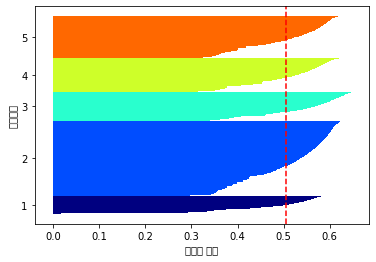

In [120]:
mAD =  member_AD.drop(['조합원상태','배송서비스신청여부','모바일알람여부','Gold_member','연령',"구","동","회원번호","연령60이상", "구매매장"],axis=1,inplace=False)
mAD = pd.get_dummies(mAD)
mAD_scaled = mAD.loc[:,['방문횟수','구매금액']]
mAD.loc[:,['방문횟수','구매금액']] = scaler.fit_transform(mAD_scaled)
clus=KMeans(5, random_state= 0)
y_km = clus.fit_predict(mAD)
plotSilhouette(mAD, y_km)

In [139]:
mA =  memberA.drop(['조합원상태','배송서비스신청여부','모바일알람여부','Gold_member','연령',"동","회원번호","연령60이상", "구매매장"],axis=1,inplace=False)
mA = pd.get_dummies(mA)
mA_scaled = mA.loc[:,['방문횟수','구매금액']]
mA.loc[:,['방문횟수','구매금액']] = scaler.fit_transform(mA_scaled)
mA[:50]

,성별,구매금액,방문횟수,연령대_4560대,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,연령대_20대이하,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대이상,구_광주,구_기타,구_기흥구,구_분당구,구_서울 강남구,구_서울 송파구,구_수원 권선구,구_수원 영통구,구_수원 장안구,구_수원 팔달구,구_수정구,구_수지구,구_중원구,구_처인구,구_하남,구_화성
3,0,0.024527,0.018072,0,0.000000,0.000000,0.000000,0.000000,0.153846,0.307692,0.000000,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0.117104,0.186747,0,0.176849,0.003215,0.016077,0.000000,0.080386,0.064309,0.000000,0.048232,0.112540,0.128617,0.000000,0.000000,0.000000,0.176849,0.192926,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0.001251,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0.038573,0.012048,1,0.000000,0.000000,0.052632,0.000000,0.000000,0.105263,0.000000,0.000000,0.052632,0.631579,0.052632,0.000000,0.000000,0.000000,0.105263,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0.020673,0.030120,1,0.083333,0.000000,0.000000,0.000000,0.416667,0.000000,0.083333,0.000000,0.000000,0.166667,0.166667,0.083333,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
11,0,0.053971,0.192771,0,0.218750,0.000000,0.015625,0.000000,0.203125,0.062500,0.000000,0.093750,0.015625,0.218750,0.000000,0.000000,0.000000,0.140625,0.031250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15,0,0.052720,0.144578,1,0.000000,0.000000,0.000000,0.000000,0.175000,0.000000,0.050000,0.025000,0.025000,0.000000,0.000000,0.000000,0.000000,0.250000,0.475000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17,0,0.009973,0.018072,1,0.000000,0.000000,0.000000,0.000000,0.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18,0,0.000524,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19,0,0.002333,0.006024,1,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib

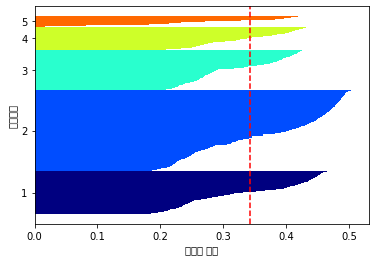

In [137]:
clus=KMeans(5, random_state= 0)
y_km = clus.fit_predict(mA)
plotSilhouette(mA, y_km)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib

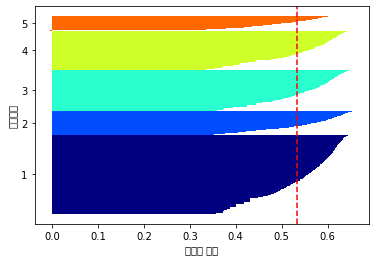

In [113]:
mB =  memberB.drop(['성별','조합원상태','배송서비스신청여부','모바일알람여부','Gold_member','연령',"구","동","회원번호","연령60이상","연령대_4560대", "구매매장"],axis=1,inplace=False)
mB = pd.get_dummies(mB)
mB_scaled = mB.loc[:,['방문횟수','구매금액']]
mB.loc[:,['방문횟수','구매금액']] = scaler.fit_transform(mB_scaled)

clus=KMeans(5, random_state= 0)
y_km = clus.fit_predict(mB)
plotSilhouette(mB, y_km)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib

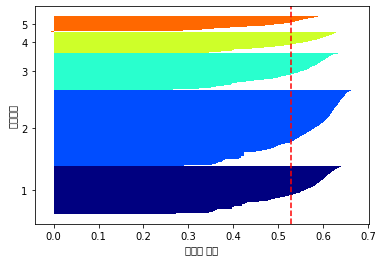

In [114]:
mC =  memberC.drop(['조합원상태','배송서비스신청여부','모바일알람여부','Gold_member','연령',"구","동","회원번호","연령60이상","연령대_4560대", "구매매장"],axis=1,inplace=False)
mC = pd.get_dummies(mC)
mC_scaled = mC.loc[:,['방문횟수','구매금액']]
mC.loc[:,['방문횟수','구매금액']] = scaler.fit_transform(mC_scaled)

clus=KMeans(5, random_state= 0)
y_km = clus.fit_predict(mC)
plotSilhouette(mC, y_km)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib

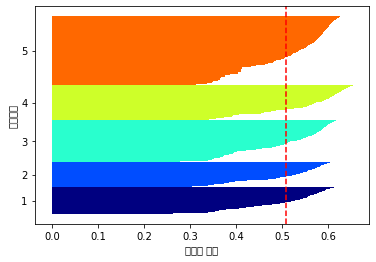

In [115]:
mD =  memberD.drop(['조합원상태','배송서비스신청여부','모바일알람여부','Gold_member','연령',"구","동","회원번호","연령60이상","연령대_4560대", "구매매장"],axis=1,inplace=False)
mD = pd.get_dummies(mD)
mD_scaled = mD.loc[:,['방문횟수','구매금액']]
mD.loc[:,['방문횟수','구매금액']] = scaler.fit_transform(mD_scaled)

clus=KMeans(5, random_state= 0)
y_km = clus.fit_predict(mD)
plotSilhouette(mD, y_km)

In [116]:
clus=KMeans(4, random_state= 0)
clus.fit(mA)
cluster_kmeans=[j+1 for j in clus.labels_]
mA["ClusterKmeans"]=cluster_kmeans

In [117]:
average_score = silhouette_score(mA.drop(['ClusterKmeans'], axis = 1), mA['ClusterKmeans'])
average_score

0.48345007915974353

In [135]:
avg = {}
for i in range(2,11):
    clus=KMeans(i, random_state =0)
    clus.fit(m_total)
    cluster_kmeans=[j+1 for j in clus.labels_]
    m_total["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(m_total.drop(['ClusterKmeans'], axis = 1), m_total['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.3407839794735183
3 : 0.4007421327012729
4 : 0.4825852068109536
5 : 0.5116240335615629
6 : 0.3620750037978221
7 : 0.34342459814100035
8 : 0.32497708141585346
9 : 0.32666589912983834
10 : 0.331005222863414


In [132]:
avg = {}
for i in range(2,11):
    clus=KMeans(i, random_state =0)
    clus.fit(mACD)
    cluster_kmeans=[j+1 for j in clus.labels_]
    mACD["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(mACD.drop(['ClusterKmeans'], axis = 1), mACD['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.3417435461395619
3 : 0.403430310603842
4 : 0.48897065848806137
5 : 0.5193191993625298
6 : 0.3773848413451457
7 : 0.3606094532458582
8 : 0.3533392499249002
9 : 0.33569253226284806
10 : 0.3436688525866709


In [107]:
member_AD

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,매장A,0.000000,0.000000,0.000000,0.0,0.153846,0.307692,0.000000,0.307692,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.153846
6,1000491648,1,0,37.0,0,0,0,30대,663152.0,수지구,동천동,0,32,0,매장A,0.176849,0.003215,0.016077,0.0,0.080386,0.064309,0.000000,0.048232,0.112540,0.128617,0.000000,0.000000,0.0,0.176849,0.192926
7,1000508352,1,0,35.0,0,0,0,30대,7083.0,기흥구,상하동,0,1,0,매장A,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,1000577024,1,0,47.0,0,0,0,40대,218435.0,기타,기타,0,3,1,매장A,0.000000,0.000000,0.052632,0.0,0.000000,0.105263,0.000000,0.000000,0.052632,0.631579,0.052632,0.000000,0.0,0.000000,0.105263
10,1000796032,1,0,40.0,0,0,0,40대,117067.0,수지구,동천동,0,6,1,매장A,0.083333,0.000000,0.000000,0.0,0.416667,0.000000,0.083333,0.000000,0.000000,0.166667,0.166667,0.083333,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11501,997909952,1,0,47.0,0,0,0,40대,139465.0,분당구,중동,0,14,1,매장D,0.187500,0.000000,0.062500,0.0,0.062500,0.000000,0.000000,0.187500,0.062500,0.062500,0.000000,0.000000,0.0,0.187500,0.187500
11512,998583680,1,0,43.0,0,0,0,40대,45276.0,서울 강남구,기타,0,2,1,매장D,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.250000
11518,998990144,1,0,40.0,0,0,0,40대,11486.0,수지구,신봉동,0,1,1,매장D,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
11530,999580352,1,0,63.0,0,0,0,60대,50925.0,수지구,신봉동,1,5,1,매장D,0.000000,0.000000,0.000000,0.0,0.222222,0.000000,0.000000,0.000000,0.111111,0.666667,0.000000,0.000000,0.0,0.000000,0.000000


/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/matplotlib

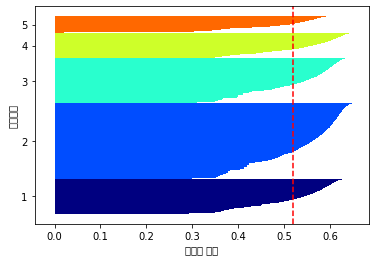

In [130]:
member_ACD = member_AD.append(memberC)
mACD =  member_ACD.drop(['조합원상태','배송서비스신청여부','모바일알람여부','Gold_member',"구","동","회원번호",'연령',"연령60이상", "구매매장"],axis=1,inplace=False)
mACD = pd.get_dummies(mACD)
mACD_scaled = mACD.loc[:,['방문횟수','구매금액']]
mACD.loc[:,['방문횟수','구매금액']] = scaler.fit_transform(mACD_scaled)

clus=KMeans(5, random_state= 0)
y_km = clus.fit_predict(mACD)
plotSilhouette(mACD, y_km)

In [122]:
member_ACD

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,매장A,0.000000,0.000000,0.000000,0.0,0.153846,0.307692,0.000000,0.307692,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.153846
6,1000491648,1,0,37.0,0,0,0,30대,663152.0,수지구,동천동,0,32,0,매장A,0.176849,0.003215,0.016077,0.0,0.080386,0.064309,0.000000,0.048232,0.112540,0.128617,0.000000,0.000000,0.0,0.176849,0.192926
7,1000508352,1,0,35.0,0,0,0,30대,7083.0,기흥구,상하동,0,1,0,매장A,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,1000577024,1,0,47.0,0,0,0,40대,218435.0,기타,기타,0,3,1,매장A,0.000000,0.000000,0.052632,0.0,0.000000,0.105263,0.000000,0.000000,0.052632,0.631579,0.052632,0.000000,0.0,0.000000,0.105263
10,1000796032,1,0,40.0,0,0,0,40대,117067.0,수지구,동천동,0,6,1,매장A,0.083333,0.000000,0.000000,0.0,0.416667,0.000000,0.083333,0.000000,0.000000,0.166667,0.166667,0.083333,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,998576256,1,0,39.0,0,0,0,30대,10434.0,수지구,풍덕천동,0,3,0,매장C,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667,0.000000
11521,99912192,1,0,64.0,0,0,0,60대,94764.0,수지구,성복동,1,11,1,매장C,0.133333,0.000000,0.000000,0.0,0.533333,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.200000,0.000000
11527,999513536,1,0,38.0,0,0,0,30대,55709.0,수지구,풍덕천동,0,4,0,매장C,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.0,0.666667,0.000000
11528,999569216,1,0,42.0,0,0,0,40대,28238.0,기흥구,보정동,0,3,1,매장C,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.000000


In [327]:
total4

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수


In [14]:
day_freq = total4.pivot_table(index = ['회원번호','공급일자','요일'], values = '구매금액', aggfunc ='sum')
day_freq['label'] = 1
day_freq_1 = day_freq.pivot_table(index = '회원번호', columns = '요일', values = 'label', aggfunc = 'sum').fillna(0)
day_ratio = day_freq_1.apply(lambda x : x/x.sum(), axis = 1)
day_ratio

요일,금,목,수,월,일,토,화
회원번호,,,,,,,
18613824,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
18764160,0.285714,0.285714,0.000000,0.00000,0.142857,0.142857,0.142857
18792000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
18942336,0.083333,0.250000,0.166667,0.25000,0.083333,0.083333,0.083333
18949760,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
1644772352,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
1644957952,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
1670400000,0.145907,0.145907,0.142349,0.13879,0.135231,0.138790,0.153025


In [15]:
day_ratio2 = pd.DataFrame({'주말' : day_ratio.금+day_ratio.토+day_ratio.일,
                          '평일' : day_ratio.월+day_ratio.화+day_ratio.수+day_ratio.목}).reset_index()
day_ratio2

,회원번호,주말,평일
0,18613824,0.000000,1.000000
1,18764160,0.571429,0.428571
2,18792000,0.000000,1.000000
3,18942336,0.250000,0.750000
4,18949760,1.000000,0.000000
...,...,...,...
11541,1644772352,0.000000,1.000000
11542,1644957952,0.000000,1.000000
11543,1670400000,0.419929,0.580071
11544,1670606016,0.500000,0.500000


In [103]:
print(day_ratio.월.sum(), day_ratio.화.sum(),day_ratio.수.sum(),day_ratio.목.sum(),day_ratio.금.sum(),day_ratio.토.sum(),day_ratio.일.sum())

1945.2802909747247 1829.4285247326784 1740.9381629592722 1740.8939356291535 1685.7942837243777 1657.3556454740856 946.3091565057076


In [16]:
mfile3 = mfile2.merge(day_ratio2, on = '회원번호')
mfile3

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,주말,평일
0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1,매장B,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0,매장C,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0,매장C,0.083333,0.0,0.000000,0.0,0.250000,0.000000,0.041667,0.000000,0.083333,0.000000,0.041667,0.000000,0.0,0.333333,0.166667,0.466667,0.533333
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,매장A,0.000000,0.0,0.000000,0.0,0.153846,0.307692,0.000000,0.307692,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.153846,0.250000,0.750000
4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1,매장C,0.155556,0.0,0.000000,0.0,0.111111,0.022222,0.044444,0.022222,0.044444,0.111111,0.000000,0.000000,0.0,0.200000,0.288889,0.464286,0.535714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0,0,47.0,0,0,0,40대,39246.0,수지구,동천동,0,1,1,매장A,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
11538,999721408,1,0,43.0,0,0,0,40대,43457.0,수지구,동천동,0,2,1,매장A,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.500000,0.500000
11539,999738112,1,0,67.0,0,0,0,60대,152960.0,수지구,성복동,1,9,1,매장D,0.416667,0.0,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.0,0.083333,0.000000,0.666667,0.333333
11540,999754816,1,0,44.0,1,0,0,40대,641334.0,수지구,상현동,0,21,1,매장B,0.156863,0.0,0.000000,0.0,0.098039,0.039216,0.000000,0.078431,0.000000,0.039216,0.000000,0.000000,0.0,0.235294,0.352941,0.190476,0.809524


In [17]:
per_item = pd.read_csv('mfile_itemcnt.csv')
per_item.head()

,Unnamed: 0,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,1회당평균구매물품수
0,0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1,2.000000
1,1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0,7.000000
2,2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0,1.600000
3,3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,3.250000
4,4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1,1.607143


In [18]:
mfile4 = mfile3.merge(per_item.loc[:,['회원번호','1회당평균구매물품수']], on = '회원번호')
mfile4

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,주말,평일,1회당평균구매물품수
0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1,매장B,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000
1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0,매장C,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,7.000000
2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0,매장C,0.083333,0.0,0.000000,0.0,0.250000,0.000000,0.041667,0.000000,0.083333,0.000000,0.041667,0.000000,0.0,0.333333,0.166667,0.466667,0.533333,1.600000
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0,매장A,0.000000,0.0,0.000000,0.0,0.153846,0.307692,0.000000,0.307692,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.153846,0.250000,0.750000,3.250000
4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1,매장C,0.155556,0.0,0.000000,0.0,0.111111,0.022222,0.044444,0.022222,0.044444,0.111111,0.000000,0.000000,0.0,0.200000,0.288889,0.464286,0.535714,1.607143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0,0,47.0,0,0,0,40대,39246.0,수지구,동천동,0,1,1,매장A,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,2.000000
11538,999721408,1,0,43.0,0,0,0,40대,43457.0,수지구,동천동,0,2,1,매장A,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.500000,0.500000,1.500000
11539,999738112,1,0,67.0,0,0,0,60대,152960.0,수지구,성복동,1,9,1,매장D,0.416667,0.0,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.0,0.083333,0.000000,0.666667,0.333333,2.666667
11540,999754816,1,0,44.0,1,0,0,40대,641334.0,수지구,상현동,0,21,1,매장B,0.156863,0.0,0.000000,0.0,0.098039,0.039216,0.000000,0.078431,0.000000,0.039216,0.000000,0.000000,0.0,0.235294,0.352941,0.190476,0.809524,2.428571


In [20]:
mfile4.to_csv('mfile_merge2.csv', index = False)

In [304]:
m_total =  mfile4.drop(['성별','연령대_4560대','조합원상태','배송서비스신청여부','모바일알람여부','연령',"구","동","회원번호","연령60이상",'주말','평일'],axis=1,inplace=False)
m_total = pd.get_dummies(m_total)
m_total_scaled = m_total.loc[:,['방문횟수','구매금액','1회당평균구매물품수']]
m_total.loc[:,['방문횟수','구매금액','1회당평균구매물품수']] = scaler.fit_transform(m_total_scaled)

In [301]:
m_total

,Gold_member,구매금액,방문횟수,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,1회당평균구매물품수,연령대_20대이하,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대이상,구매매장_매장A,구매매장_매장B,구매매장_매장C,구매매장_매장D
0,0,0.000784,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.086957,0,0,0,1,0,0,0,1,0,0
1,0,0.003781,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.304348,0,1,0,0,0,0,0,0,1,0
2,0,0.014618,0.078652,0.083333,0.0,0.000000,0.0,0.250000,0.000000,0.041667,0.000000,0.083333,0.000000,0.041667,0.000000,0.0,0.333333,0.166667,0.069565,0,1,0,0,0,0,0,0,1,0
3,0,0.014215,0.016854,0.000000,0.0,0.000000,0.0,0.153846,0.307692,0.000000,0.307692,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.153846,0.141304,0,0,0,0,0,1,1,0,0,0
4,0,0.064739,0.151685,0.155556,0.0,0.000000,0.0,0.111111,0.022222,0.044444,0.022222,0.044444,0.111111,0.000000,0.000000,0.0,0.200000,0.288889,0.069876,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,0,0.004017,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.086957,0,0,1,0,0,0,1,0,0,0
11538,0,0.004448,0.005618,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.065217,0,0,1,0,0,0,1,0,0,0
11539,0,0.015655,0.044944,0.416667,0.0,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.0,0.083333,0.000000,0.115942,0,0,0,0,1,0,0,0,0,1
11540,0,0.065638,0.112360,0.156863,0.0,0.000000,0.0,0.098039,0.039216,0.000000,0.078431,0.000000,0.039216,0.000000,0.000000,0.0,0.235294,0.352941,0.105590,0,0,1,0,0,0,0,1,0,0


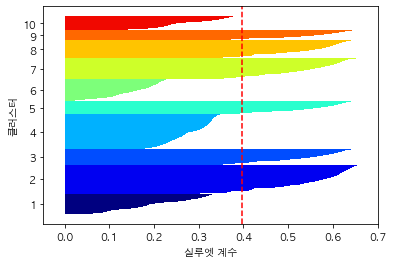

In [310]:
clus=KMeans(10, random_state= 0)
y_km = clus.fit_predict(m_total)
plotSilhouette(m_total, y_km)

In [302]:
avg = {}
for i in range(2,25):
    clus=KMeans(i, random_state =0)
    clus.fit(m_total)
    cluster_kmeans=[j+1 for j in clus.labels_]
    m_total["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(m_total.drop(['ClusterKmeans'], axis = 1), m_total['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.18181781618420123
3 : 0.24930253815268677
4 : 0.3034965309825138
5 : 0.2658986103545984
6 : 0.28104769068610236
7 : 0.3073952306253802
8 : 0.32309812595060244
9 : 0.3502778398275134
10 : 0.37039784591069375
11 : 0.39629243169881234
12 : 0.41641934572805067
13 : 0.43558536559824296
14 : 0.4533997231966805
15 : 0.4709037945922655
16 : 0.48582675708022743
17 : 0.500034352022115
18 : 0.5118158342630185
19 : 0.5240824131274894
20 : 0.46165985152253153
21 : 0.4546650937566975
22 : 0.4291267019439149
23 : 0.39268879454947536
24 : 0.3901436666614848


In [94]:
total4

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수


In [367]:
total4.loc[total4.물품소분류 == '스낵']

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
25,2018-01-02,1376851328,정상회원,간식,과자,스낵,찹쌀누룽지(300g),1.0,7275.0,매장A,NaN,18:12,1,화
55,2018-01-02,841779520,정상회원,간식,과자,스낵,도깨비방망이과자(80g),1.0,4212.0,매장A,NaN,19:31,1,화
59,2018-01-02,1200625984,정상회원,간식,과자,스낵,동그랑쌀과자(70g),1.0,4595.0,매장A,NaN,10:43,1,화
69,2018-01-02,62261376,정상회원,간식,과자,스낵,우리밀유정란전병(150g),2.0,8423.0,매장A,NaN,15:13,1,화
84,2018-01-02,1038166592,정상회원,간식,과자,스낵,찹쌀누룽지(300g),1.0,7275.0,매장A,NaN,18:13,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291924,2018-10-31,473688320,정상회원,간식,과자,스낵,두부과자(100g),1.0,4403.0,매장D,NaN,11:03,10,수
291958,2018-10-31,771448256,정상회원,간식,과자,스낵,꿀을바른바삭한쌀스낵(80g),2.0,5743.0,매장D,NaN,15:37,10,수
291995,2018-10-31,1363391616,정상회원,간식,과자,스낵,하늘땅옥수수(55g),1.0,3542.0,매장D,NaN,15:30,10,수
291996,2018-10-31,467147776,정상회원,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829.0,매장D,NaN,13:28,10,수


In [306]:
clus=KMeans(4, random_state= 0)
clus.fit(m_total)
cluster_kmeans=[j+1 for j in clus.labels_]
m_total["ClusterKmeans"]=cluster_kmeans

In [307]:
ds_summary_km=m_total.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,1회당평균구매물품수_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장A_mean,구매매장_매장B_mean,구매매장_매장C_mean,구매매장_매장D_mean
0,1,0.009217,0.027816,0.057661,0.190817,0.021287,0.026241,0.001658,0.127938,0.061675,0.009893,0.075523,0.053839,0.071006,0.014468,0.017136,0.002964,0.179612,0.144561,0.092997,0.007834,0.204608,0.409677,0.216129,0.116129,0.045622,1,0,0,0
1,2,0.028604,0.031357,0.078254,0.164370,0.014170,0.022202,0.001077,0.149444,0.041033,0.010677,0.072260,0.057264,0.060860,0.014313,0.016020,0.001116,0.199772,0.175423,0.086833,0.003890,0.182838,0.386499,0.242563,0.110526,0.073684,0,0,1,0
2,3,0.015204,0.031293,0.066900,0.159974,0.014752,0.027587,0.001613,0.133522,0.049087,0.009694,0.077154,0.065398,0.059043,0.016506,0.015478,0.001169,0.207845,0.160199,0.093832,0.003923,0.132908,0.347719,0.210397,0.178519,0.126533,0,0,0,1
3,4,0.009787,0.025342,0.053139,0.179589,0.018713,0.017932,0.001505,0.131673,0.045813,0.009438,0.075013,0.059915,0.075686,0.016354,0.013629,0.002171,0.183578,0.168990,0.096191,0.003712,0.209585,0.401282,0.197435,0.119474,0.068512,0,1,0,0
